In [1]:
#import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


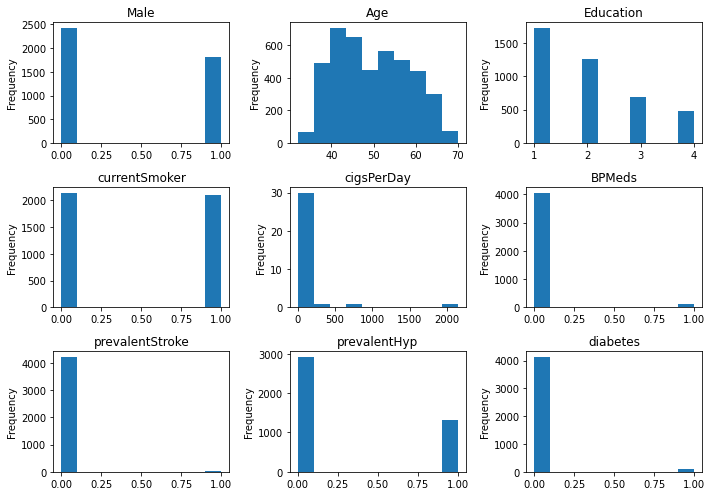

In [3]:
plt.figure(figsize=(10,7))
plt.subplot(3,3,1)
df["male"].plot(kind="hist", title="Male")

plt.subplot(3,3,2)
df["age"].plot(kind="hist", title="Age")

plt.subplot(3,3,3)
df["education"].plot(kind="hist", title="Education")

plt.subplot(3,3,4)
df["currentSmoker"].plot(kind="hist", title="currentSmoker")

plt.subplot(3,3,5)
df["cigsPerDay"].value_counts().plot(kind="hist", title="cigsPerDay")

plt.subplot(3,3,6)
df["BPMeds"].plot(kind="hist", title="BPMeds")

plt.subplot(3,3,7)
df["prevalentStroke"].plot(kind="hist", title="prevalentStroke")

plt.subplot(3,3,8)
df["prevalentHyp"].plot(kind="hist", title="prevalentHyp")

plt.subplot(3,3,9)
df["diabetes"].plot(kind="hist", title="diabetes")
plt.tight_layout()

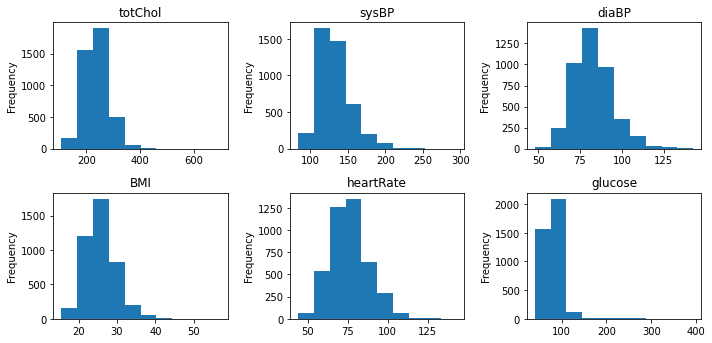

In [4]:
plt.figure(figsize=(10,7))
plt.subplot(3,3,1)
df["totChol"].plot(kind="hist", title="totChol")

plt.subplot(3,3,2)
df["sysBP"].plot(kind="hist", title="sysBP")

plt.subplot(3,3,3)
df["diaBP"].plot(kind="hist", title="diaBP")

plt.subplot(3,3,4)
df["BMI"].plot(kind="hist",title="BMI")

plt.subplot(3,3,5)
df["heartRate"].plot(kind="hist",title = "heartRate")

plt.subplot(3,3,6)
df["glucose"].plot(kind = "hist",title = "glucose")
plt.tight_layout()

In [5]:
df[df['TenYearCHD']==0]['TenYearCHD'].value_counts()# count how many times zero is present in TenYearCHD column

0    3594
Name: TenYearCHD, dtype: int64

In [6]:
df["TenYearCHD"].value_counts()#count the values in tenyearCHD column

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
df=df.fillna(0)#fills null cells with zero

In [9]:
X = df.iloc[:,:-1] #all coumns except last column
y = df.iloc[:,-1] #only last column

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=20)

In [11]:
svm =SVC()
model = svm.fit(x_train,y_train)

In [12]:
y_pred = model.predict(x_test)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [13]:
y_test[:5]

2639    0
2292    0
3387    0
1909    0
1667    0
Name: TenYearCHD, dtype: int64

In [14]:
accuracy = accuracy_score(y_pred,y_test)
accuracy

0.9

In [17]:
score = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
score[:4]

,Actual,Predicted
456,0,0
628,0,0
3087,0,0
3100,0,0
